In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Load and Explore Dataset

In [29]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
print(train_labels[:10])

[9 0 0 3 0 2 7 2 5 5]


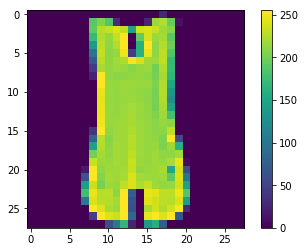

In [11]:
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

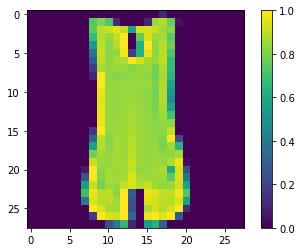

In [13]:
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.show()

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])

model.compile(optimizer= 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs=5,)

Epoch 1/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4943 - acc: 0.8249
Epoch 2/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3739 - acc: 0.8647
Epoch 3/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3332 - acc: 0.8789
Epoch 4/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3123 - acc: 0.8863
Epoch 5/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2933 - acc: 0.8933


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss, test_acc)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.3912 - acc: 0.8580
0.39121899201869964 0.858


In [27]:
predictions = model.predict(test_images)
print("Shape \t: ", predictions.shape)
print("Values \t: ", predictions[0])

print()
print("Pred \t: ", np.argmax(predictions[0:20], axis=1))
print("True \t: ", test_labels[0:20])

Shape 	:  (10000, 10)
Values 	:  [1.2125207e-07 2.6915997e-10 1.3557791e-08 8.0844581e-10 5.4247664e-08
 6.1583880e-04 1.3752168e-07 2.3516238e-04 9.7939721e-07 9.9914765e-01]

Pred 	:  [9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0]
True 	:  [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]
